<a href="https://colab.research.google.com/github/Ayush4454/Prodigy_ML_Task5/blob/main/food_and_vegetables_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
training_set =tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/food and vegetables recognition/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3115 files belonging to 36 classes.


In [39]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/food and vegetables recognition/validation",

    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


In [26]:
cnn = tf.keras.models.Sequential()

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [30]:
cnn.add(tf.keras.layers.Flatten())

In [31]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [32]:
cnn.add(tf.keras.layers.Dense(units=36,activation='relu'))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [34]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [35]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 36)                  │           4,644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           1,332 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,650,456 (6.30 MB)

 Trainable params: 1,650,456 (6.30 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 1269s 13s/step - accuracy: 0.0235 - loss: 20.2377 - val_accuracy: 0.0256 - val_loss: 3.5836
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 704ms/step - accuracy: 0.0342 - loss: 3.5826 - val_accuracy: 0.0256 - val_loss: 3.5837
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 707ms/step - accuracy: 0.0349 - loss: 3.5819 - val_accuracy: 0.0256 - val_loss: 3.5838
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 710ms/step - accuracy: 0.0324 - loss: 3.5814 - val_accuracy: 0.0256 - val_loss: 3.5840
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 669ms/step - accuracy: 0.0351 - loss: 3.5806 - val_accuracy: 0.0256 - val_loss: 3.5842
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 709ms/step - accuracy: 0.0349 - loss: 3.5804 - val_accuracy: 0.0256 - val_loss: 3.5845
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 705ms/step - accuracy: 0.0352 - loss: 3.5794 - val_accuracy: 0.0256 - val_loss: 3.5847
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 711ms/step - accuracy: 0.0351 - loss: 3.5797 - val_acc

In [54]:
cnn.save('trained_model.h5')

In [44]:
training_history.history #Return Dictionary of history

{'accuracy': [0.02375601977109909,
  0.031139647588133812,
  0.030818618834018707,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.030818618834018707,
  0.026645265519618988,
  0.030176565051078796,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883,
  0.03178170323371887,
  0.03210273012518883,
  0.03210273012518883,
  0.031139647588133812,
  0.03242375701665878,
  0.02921348251402378,
  0.030176565051078796,
  0.030176565051078796,
  0.028892455622553825,
  0.03210273012518883,
  0.03210273012518883,
  0.03210273012518883],
 'loss': [7.730839729309082,
  3.582578659057617,
  3.5819051265716553,
  3.5813071727752686,
  3.580854892730713,
  3.5804214477539062,
  3.5800442695617676,
  3.579789400100708,
  3.57953143119812,
  3.5793545246124268,
  3.5792131423950195

In [55]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [56]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [58]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 2.849002927541733 %


In [59]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 593ms/step - accuracy: 0.0331 - loss: 3.5769
Training accuracy: 0.03210273012518883


In [60]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 863ms/step - accuracy: 0.0139 - loss: 3.5912
Validation accuracy: 0.028490029275417328


In [61]:
#training_history.history['accuracy']

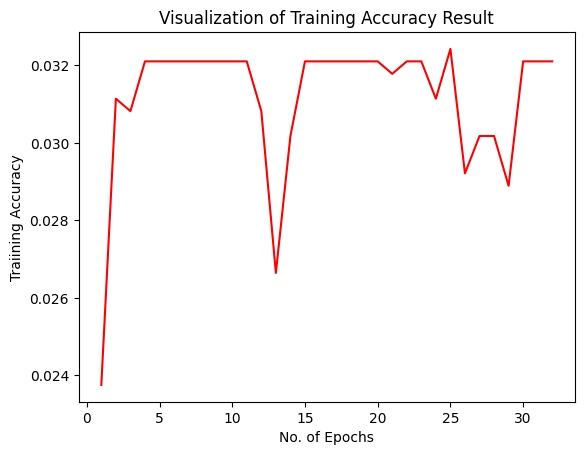

In [62]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

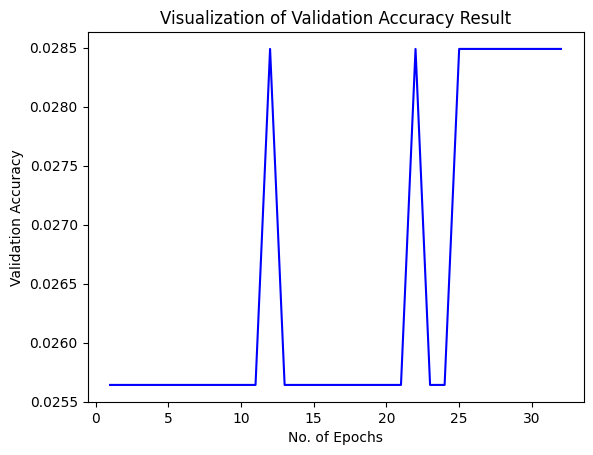

In [63]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()